# keras_MINST_V1

Import library

In [24]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
from typing import Any

In [2]:
np.random.seed(1671)  # for reproducibility

Setting Network and Training parameter

In [3]:
NB_EPOCH = 10
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10   # number of outputs = number of digits
OPTIMIZER = SGD() # SGD optimizer, explained later in this chapter
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION

It easy to prepare data shuffled and split between train and test sets

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784

In [5]:
RESHAPED = 784

X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

Normalize processgin 

In [6]:
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


Convert class vectors to binary class metrices

In [7]:
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

Simple model setting 

In [8]:
model = Sequential()
model.add(Dense(NB_CLASSES, input_shape=(RESHAPED,)))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


Setting training parameter

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer=OPTIMIZER,
              metrics=['accuracy'])

Training 

In [10]:
history = model.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE, epochs=NB_EPOCH,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 0s - loss: 1.3633 - acc: 0.6796 - val_loss: 0.8904 - val_acc: 0.8246
Epoch 2/10
48000/48000 [==============================] - 0s - loss: 0.7913 - acc: 0.8272 - val_loss: 0.6572 - val_acc: 0.8546
Epoch 3/10
48000/48000 [==============================] - 0s - loss: 0.6436 - acc: 0.8497 - val_loss: 0.5625 - val_acc: 0.8681
Epoch 4/10
48000/48000 [==============================] - 0s - loss: 0.5717 - acc: 0.8602 - val_loss: 0.5098 - val_acc: 0.8765
Epoch 5/10
48000/48000 [==============================] - 0s - loss: 0.5276 - acc: 0.8678 - val_loss: 0.4758 - val_acc: 0.8826
Epoch 6/10
48000/48000 [==============================] - 0s - loss: 0.4973 - acc: 0.8726 - val_loss: 0.4515 - val_acc: 0.8866
Epoch 7/10
48000/48000 [==============================] - 0s - loss: 0.4748 - acc: 0.8775 - val_loss: 0.4333 - val_acc: 0.8882
Epoch 8/10
48000/48000 [==============================] - 0s 

Evaluate 

In [11]:
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print("\nTest accuracy:", score[1])

 7840/10000 [======================>.......] - ETA: 0s
Test score: 0.39975739063

Test accuracy: 0.8949


# keras_MINST_V2

Define the model

M_HIDDEN hidden layers 10 outputs final stage is softmax

In [12]:
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_3 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_4 (Activation)    (None, 10)                0         
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


Define Train and evaluate process

## Define train and evaluate function

In [28]:
def train_and_evaluate(model: Sequential=None, callbacks: list=[], optimizer: Any=SGD()):
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    history = model.fit(X_train, Y_train,
                        batch_size=BATCH_SIZE, epochs=NB_EPOCH,
                        callbacks=callbacks,
                        verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
    score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
    print("\nTest score:", score[0])
    print("\nTest accuracy:", score[1])
    return history

## Define visualize result

In [29]:
from time import gmtime, strftime
from keras.callbacks import TensorBoard
import os

def make_tensorboard(set_dir_name: str=''):
    tictoc = strftime("%a_%d_%b_%Y_%H_%M_%S", gmtime())
    directory_name = tictoc
    log_dir = set_dir_name + '_' + directory_name
    os.mkdir(log_dir)
    tensorboard = TensorBoard(log_dir=log_dir, write_graph=True, )
    return tensorboard

In [30]:
train_and_evaluate(model, callbacks=[make_tensorboard(set_dir_name='keras_MINST_V2')])

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 1s - loss: 0.2840 - acc: 0.9166 - val_loss: 0.1940 - val_acc: 0.9433
Epoch 2/10
48000/48000 [==============================] - 1s - loss: 0.2792 - acc: 0.9180 - val_loss: 0.1894 - val_acc: 0.9462
Epoch 3/10
48000/48000 [==============================] - 1s - loss: 0.2707 - acc: 0.9208 - val_loss: 0.1856 - val_acc: 0.9467
Epoch 4/10
48000/48000 [==============================] - 1s - loss: 0.2709 - acc: 0.9223 - val_loss: 0.1815 - val_acc: 0.9486
Epoch 5/10
48000/48000 [==============================] - 1s - loss: 0.2619 - acc: 0.9229 - val_loss: 0.1787 - val_acc: 0.9495
Epoch 6/10
48000/48000 [==============================] - 1s - loss: 0.2558 - acc: 0.9263 - val_loss: 0.1747 - val_acc: 0.9497
Epoch 7/10
48000/48000 [==============================] - 1s - loss: 0.2522 - acc: 0.9264 - val_loss: 0.1728 - val_acc: 0.9501
Epoch 8/10
48000/48000 [==============================] - 1s 

# keras_MINST_V3

In [16]:
from keras.layers.core import Dropout
DROPOUT = 0.3

model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_5 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_6 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
__________

In [19]:
history = train_and_evaluate(model, callbacks=[make_tensorboard(set_dir_name='keras_MINST_V3')])

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 1s - loss: 0.3802 - acc: 0.8890 - val_loss: 0.2537 - val_acc: 0.9271
Epoch 2/10
48000/48000 [==============================] - 1s - loss: 0.3669 - acc: 0.8929 - val_loss: 0.2449 - val_acc: 0.9303
Epoch 3/10
48000/48000 [==============================] - 1s - loss: 0.3542 - acc: 0.8968 - val_loss: 0.2363 - val_acc: 0.9320
Epoch 4/10
48000/48000 [==============================] - 1s - loss: 0.3424 - acc: 0.8990 - val_loss: 0.2295 - val_acc: 0.9343
Epoch 5/10
48000/48000 [==============================] - 1s - loss: 0.3334 - acc: 0.9014 - val_loss: 0.2233 - val_acc: 0.9353
Epoch 6/10
48000/48000 [==============================] - 1s - loss: 0.3213 - acc: 0.9057 - val_loss: 0.2176 - val_acc: 0.9369
Epoch 7/10
48000/48000 [==============================] - 1s - loss: 0.3166 - acc: 0.9072 - val_loss: 0.2124 - val_acc: 0.9383
Epoch 8/10
48000/48000 [==============================] - 1s 

dict_keys(['loss', 'val_acc', 'acc', 'val_loss'])


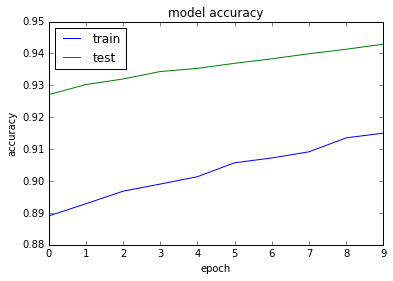

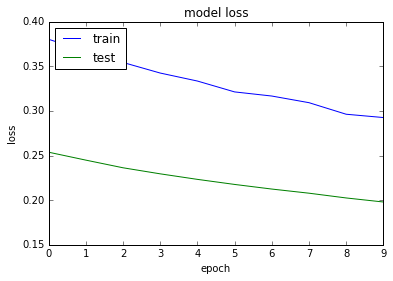

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# keras_MINST_V4

In [31]:
from keras.optimizers import RMSprop
history = train_and_evaluate(model, callbacks=[make_tensorboard(set_dir_name='keras_MINST_V4')], optimizer=RMSprop())

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 1s - loss: 0.2285 - acc: 0.9327 - val_loss: 0.1317 - val_acc: 0.9608
Epoch 2/10
48000/48000 [==============================] - 1s - loss: 0.1747 - acc: 0.9486 - val_loss: 0.1085 - val_acc: 0.9700
Epoch 3/10
48000/48000 [==============================] - 1s - loss: 0.1474 - acc: 0.9564 - val_loss: 0.1083 - val_acc: 0.9689
Epoch 4/10
48000/48000 [==============================] - 1s - loss: 0.1277 - acc: 0.9616 - val_loss: 0.0986 - val_acc: 0.9720
Epoch 5/10
48000/48000 [==============================] - 1s - loss: 0.1201 - acc: 0.9641 - val_loss: 0.0985 - val_acc: 0.9728
Epoch 6/10
48000/48000 [==============================] - 1s - loss: 0.1070 - acc: 0.9682 - val_loss: 0.0984 - val_acc: 0.9736
Epoch 7/10
48000/48000 [==============================] - 1s - loss: 0.1016 - acc: 0.9703 - val_loss: 0.0955 - val_acc: 0.9753
Epoch 8/10
48000/48000 [==============================] - 1s 

dict_keys(['loss', 'val_acc', 'acc', 'val_loss'])


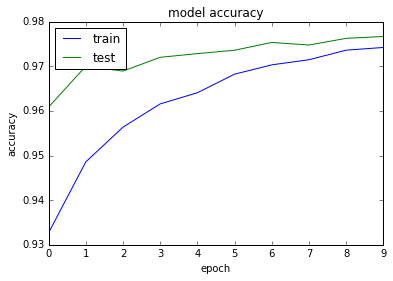

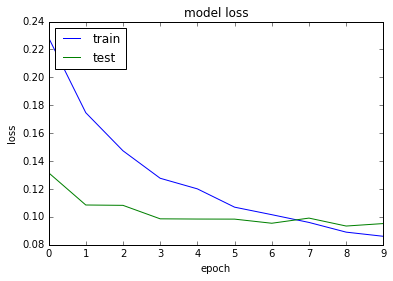

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Visualize Keras

1: Run the below code
2: You will access 'localhost:6006'

You can see the such things

https://www.youtube.com/watch?edit=vd&v=tgRW3BRi_FA